In [4]:
import pymongo
import json
from pymongo import MongoClient
from datetime import datetime

In [7]:
result = reddit_comment_all.aggregate([
  {"$match":{"data.subreddit": { "$eq": "Monero" }}},
  {
     "$group": { 
        "_id": "$data.link_id", 
        "count": { "$sum": 1}, 
        "dist_authors": { "$push": "$data.author" },
     },
  },
  {"$project":{"_id":1,"data.author":1, "count":1, "dist_authors":1}},
#   {"$limit": 1000}
])

with open('./data/comment_all_monero_comma.json', 'w') as outfile:
    outfile.write('[')
    for x in result:
        x = str(x).replace("'",'"')
        outfile.writelines(str (x) + ",")
    outfile.write(']')
outfile.close()

with open('./data/comment_all_monero_comma.json', 'r') as f:
    data = f.read()
    data_new = data.rstrip(',]') + ']'

with open('./data/comment_all_monero_noComma.json', 'w') as fp:
    fp.write(data_new)

In [8]:
with open('./data/comment_all_monero_noComma.json', 'r') as f:
    comment_data = json.load(f)

In [9]:
comment_data[1]

{'_id': 't3_982nai',
 'count': 9,
 'dist_authors': ['Chakra_Scientist',
  'Dnzo99',
  'garyziasshole',
  'garyziasshole',
  'Dnzo99',
  'codezilly',
  'Dnzo99',
  'codezilly',
  'Dnzo99']}

In [10]:
reddit_link_all_result = reddit_link_all.aggregate([
    {"$match":{"data.subreddit": { "$eq": "Monero" }}},
#     {"$limit": 1000},
    {"$project":{"_id":1, "data.author":1, "data.id":1}},
])

In [11]:
with open('./data/link_all_monero_comma.json', 'w') as outfile:
    outfile.write('[')
    for x in reddit_link_all_result:
        x = str(x).replace("'",'"')
#         print(x)
        outfile.writelines(str(x) + ',')
    outfile.write(']')
with open('./data/link_all_monero_comma.json', 'r') as f:
    data = f.read()
    data_new = data.rstrip(',]') + ']'

with open('./data/link_all_monero_noComma.json', 'w') as fp:
    fp.write(data_new)

In [12]:
with open('./data/link_all_monero_noComma.json', 'r') as f:
    link_data = json.load(f)

In [13]:
link_dic = {}
for i in range(len(link_data)):
#     print(link_data[i]["data"]["id"])
    t3id = 't3_'+ link_data[i]["data"]["id"]
#     print (t3id)
    for j in range(len(comment_data)):
#         print(comment_data[j]["_id"])
        comment_id = comment_data[j]["_id"]
        if t3id == comment_id:
#             print(t3id)
            comment_data[j]["_id"] = link_data[i]["data"]["author"]          
#         else:
#             print('0')
        
# print(comment_data)

In [14]:
print(comment_data[10])

{'count': 4, '_id': 'absolute757', 'dist_authors': ['robodan918', 'needmoney90', 'dEBRUYNE_1', 'selsta']}


In [15]:
with open("./data/author_list_monero.json","w") as f:
    json.dump(comment_data,f)
    print("加载入文件完成...")

加载入文件完成...


In [16]:
with open('./data/author_list_monero.json', 'r') as f:
    author_list_monero = json.load(f)

In [17]:
author_list_monero[10]

{'_id': 'absolute757',
 'count': 4,
 'dist_authors': ['robodan918', 'needmoney90', 'dEBRUYNE_1', 'selsta']}

In [19]:
import networkx as nx
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize # import figsize

PageRank Relationship
['[deleted]', 'dEBRUYNE_1', 'AutoModerator', 'devlishro', 'czechrebel3', 'himynameisubik', 'bitfinexlove', 'Vespco', 'OsrsNeedsF2P', 'KnifeOfPi2', 'moneroguy463728', 'fluffyponyza', 'Rehrar', 'MrFussyVendor', 'americanpegasus', 'cslashm', 'kemonine', 'SamsungGalaxyPlayer', 'ParkerVFX', 'brighteye000', 'I-paint-things', 'hodl_donkey', 'e7zLnVMKqGdr8xfL', 'SecretApe', 'factfact', 'anythingtechpro', 'xmr-monk', 'ethos_io', 'jbuuuush', 'Stuxnut', 'crazyflashpie', 'Protectingcoin', 'fireice_uk', 'ButtMeUp', 'equismic', 'm2049r', 'Beemoe4', 'cryptocomicon', 'gingeropolous', 'Bitcoinfriend', 'htbridgedigital', 'changellystolemymone', 'ErCiccione', 'Blim_Blam_007', 'jwinterm', 'cazala2', 'EncryptionPrincess', 'andon_', 'john_alan', 'etix']
[0.009155669761507078, 0.008359672974546142, 0.0077665719127893015, 0.004244532094394332, 0.002790061607616219, 0.0027313376269972977, 0.0023722869679683256, 0.0022785490549155846, 0.002161619364397211, 0.002034931815845783, 0.001962988

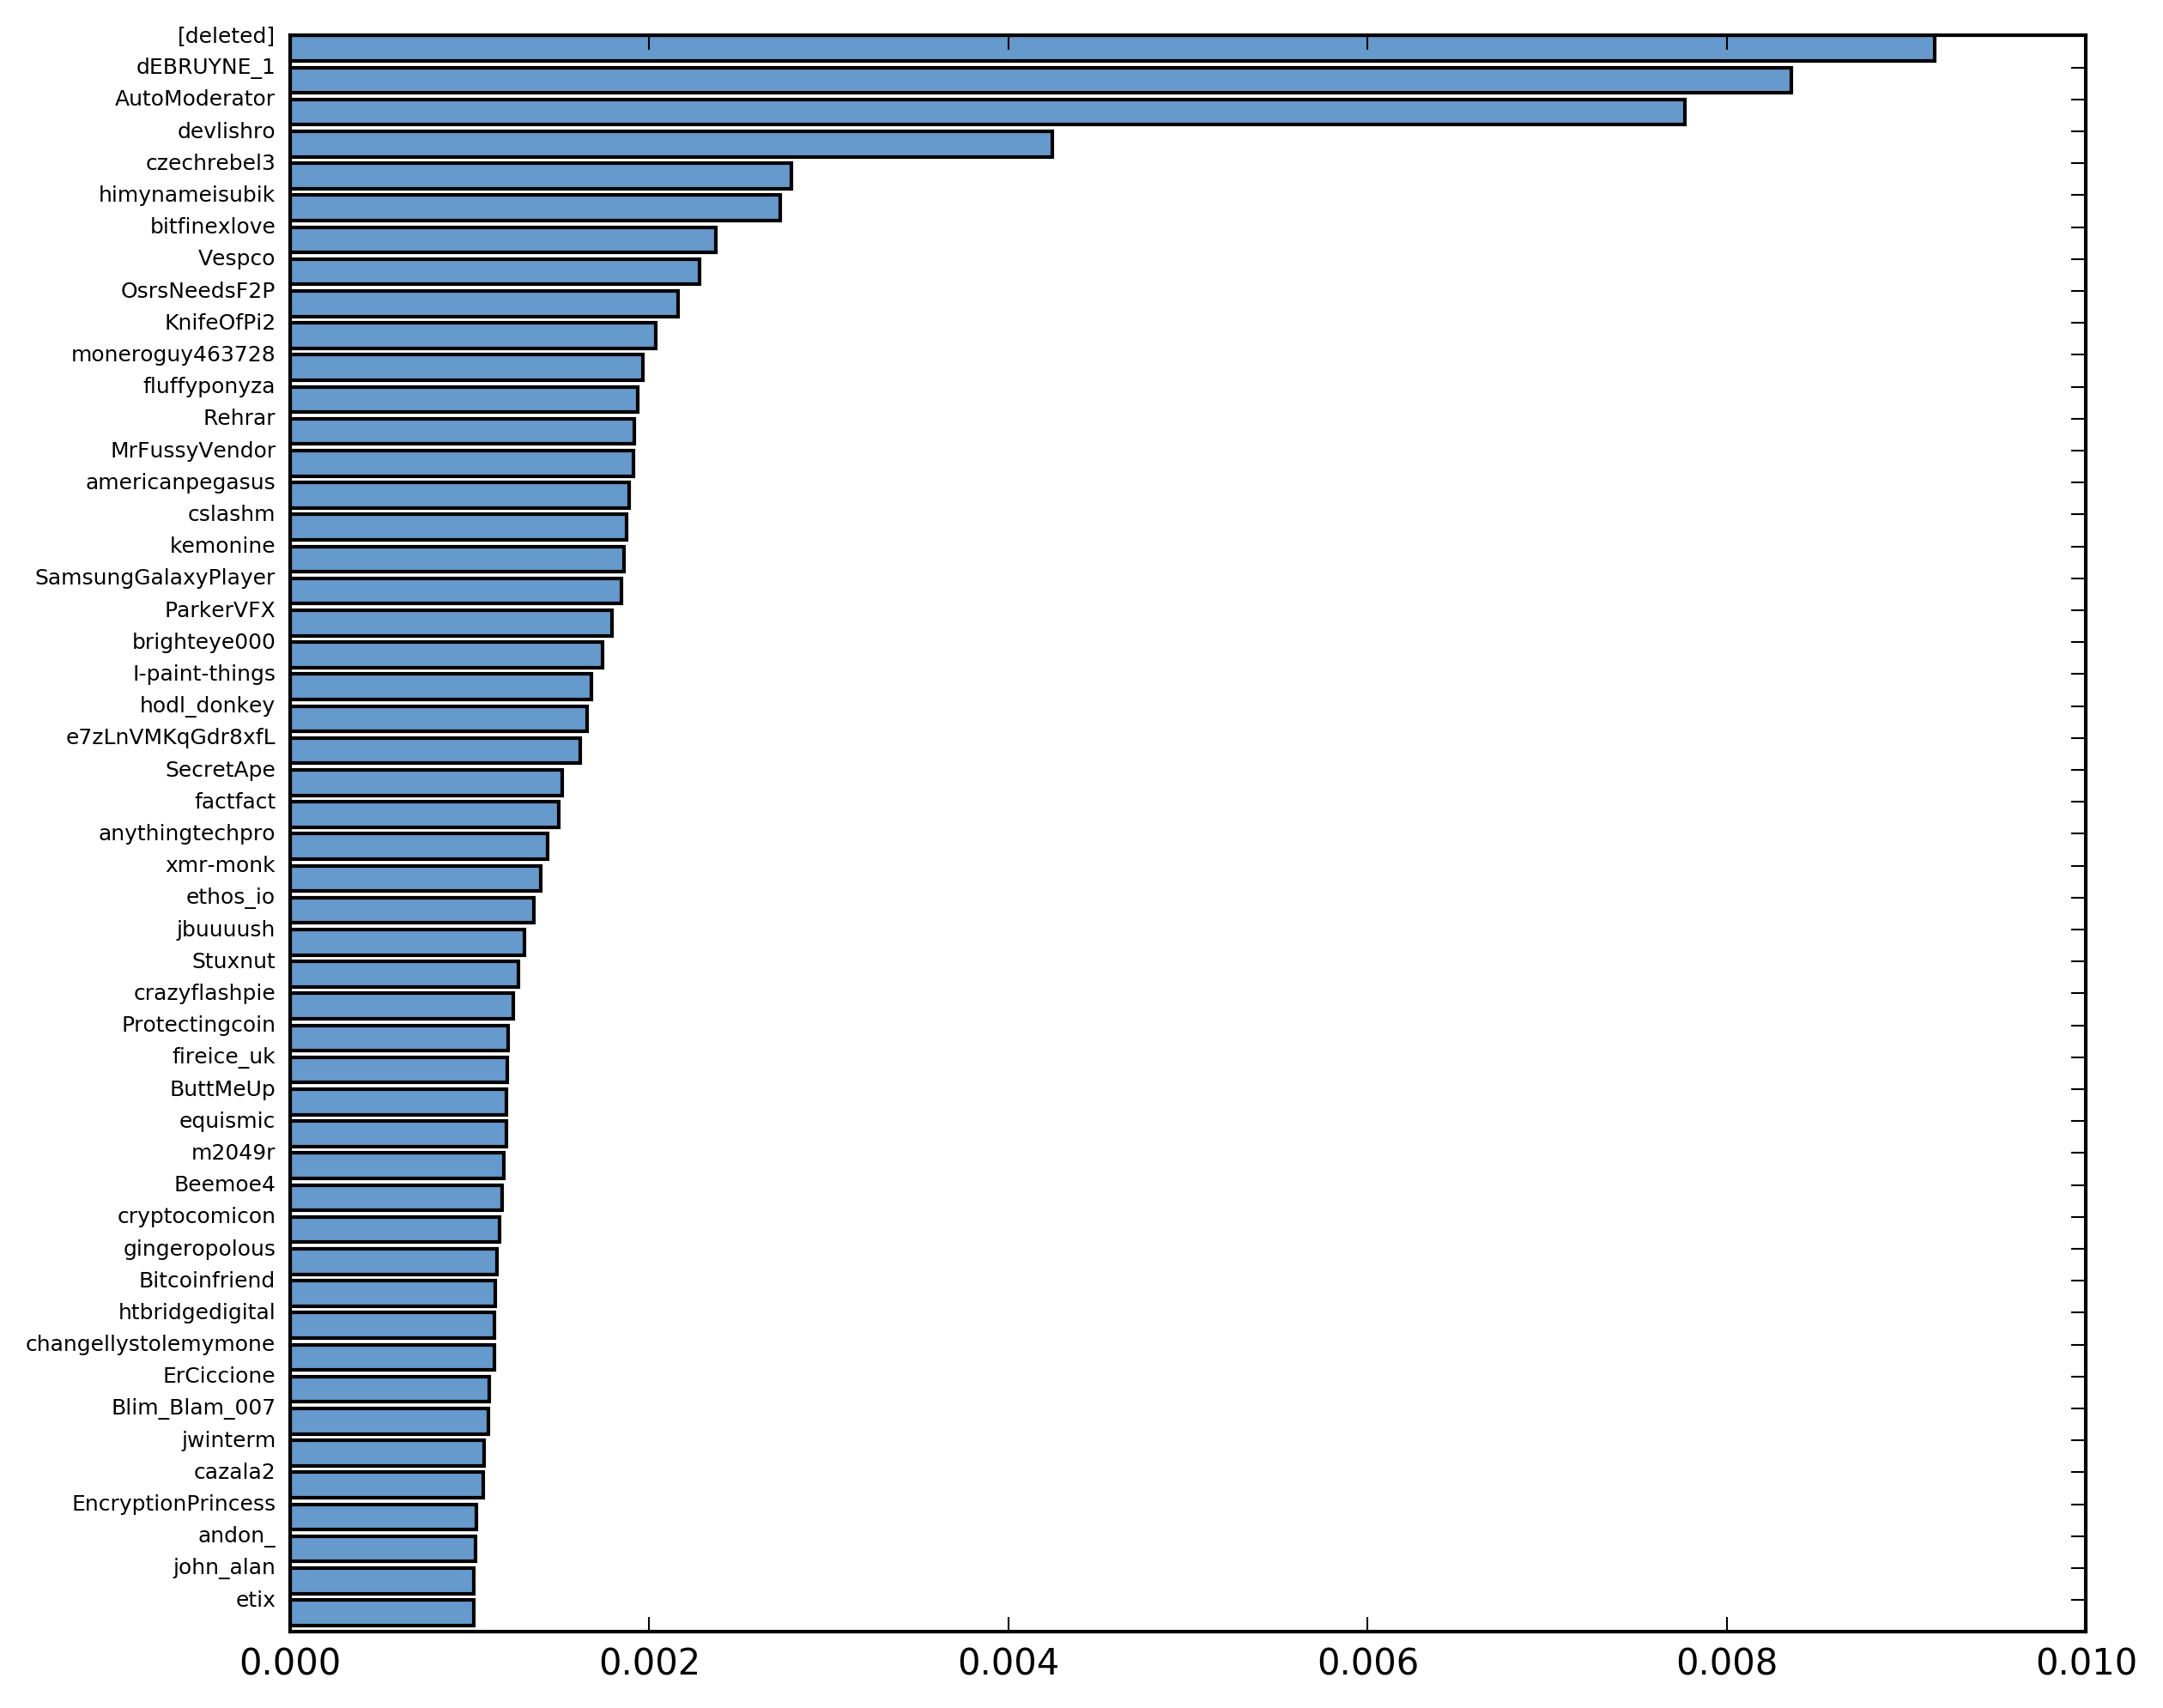

In [20]:
data = author_list_monero
edgeList = []
for i in range(len(data)):
    for j in range(len(data[i]['dist_authors'])):
        a = []
        a.append(data[i]['dist_authors'][j])
        a.append(data[i]['_id'])
        b = tuple(a)
        edgeList.append(b)

def buildDiGraph(edges):
    """
    初始化图
    :param edges: 存储有向边的列表
    :return: 使用有向边构造完毕的有向图
    """
    G = nx.DiGraph()   # DiGraph()表示有向图
    for edge in edges:
        G.add_edge(edge[0], edge[1])   # 加入边
    return G

if __name__ == '__main__':
    print('PageRank Relationship')
    edges = edgeList
    G = buildDiGraph(edges)

    # pagerank计算，随机跳跃概率为15%，因此alpha=0.85
    pr_value = nx.pagerank(G, alpha=0.85, max_iter=100)
#     print("pagerank值是：", pr_value)

items=pr_value.items()
backitems=[[v[1],v[0]] for v in items]
backitems.sort(reverse=True)
link_id = [ backitems[i][1] for i in range(0,50)]
link_score = [ backitems[i][0] for i in range(0,50)]
print(link_id)
print(link_score)

plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.rcParams['figure.figsize'] = (9, 8)
fig,ax=plt.subplots()
ax.barh(np.arange(len(link_id)),link_score,color='#6699CC')
ax.set_yticks(np.arange(len(link_id)))
ax.set_yticklabels(link_id,fontsize =6)
ax.invert_yaxis()
plt.show()